In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import tensorflow as tf
import math
from sklearn import model_selection
import keras

from keras import layers
from keras import models
from keras import Model
from keras.datasets import mnist
from keras import backend as K
from keras import metrics
from keras import optimizers

K.tensorflow_backend._get_available_gpus()
# The Function used to plot the original image and the predicted image 
def Plot_Img(n,images,fig_w,fig_h):
    # n is how many digits we will display//
    plt.figure(figsize=(fig_w, fig_h))
    for i in range(n):
        # display images
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])

import random
# The Function used to remove the middle square of the image
def Img_incomp_rand(imgs,cond,w=12):
    n = imgs.shape[0]
    for i in range(n):
        start = random.randint(0,31-w)
        end = start+w
        imgs[i][start:end,start:end,:] = 0
        cond[i][start:end,start:end,:] = 0
    return imgs,cond  
  
h_dim = 1024
batch_size = 50
height = 32
width = 32
channels = 3

Using TensorFlow backend.


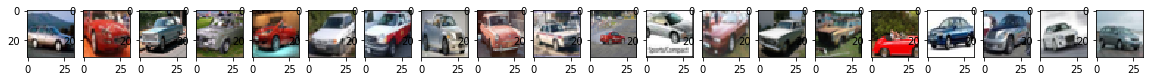

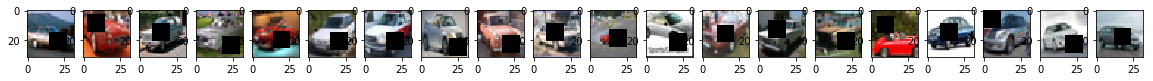

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train[y_train.flatten() == 1]
x_test = x_test[y_test.flatten() == 1]

(x_tra,y_tra),(x_te,y_te) = keras.datasets.cifar10.load_data()
x_tra = x_tra[y_tra.flatten() == 1]
x_te = x_te[y_te.flatten() == 1]

cond_train = np.ones((x_train.shape[0],32,32,3))
cond_test = np.ones((x_test.shape[0],32,32,3))
# Modfied training and testing imgs
x_train,cond_train = Img_incomp_rand(x_train,cond_train)
x_test,cond_test = Img_incomp_rand(x_test,cond_test)

# Plot some examples
Plot_Img(20,x_tra,20,10)
Plot_Img(20,x_train,20,10)
plt.show()

##Generator and Discriminator 1

In [3]:
g_input = layers.Input(shape=(height,width,3))

#x = layers.Reshape((32,32,1))(g_input)
x = layers.Conv2D(64,5,activation='relu',padding='same')(g_input)
x = layers.Conv2D(64,5,activation='relu',padding='same')(x)
x = layers.Conv2D(64,5,activation='relu',padding='same')(x)
x = layers.Conv2D(64,5,activation='relu',padding='same')(x)
x = layers.Conv2D(64,5,activation='relu',padding='same')(x)
x = layers.Conv2D(64,5,activation='relu',padding='same')(x)
x = layers.Conv2D(3,3,activation='tanh',padding='same')(x)

generator = models.Model(g_input,x)
generator.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
conv

In [4]:
d_input = layers.Input(shape=(height,width,channels))
y = layers.Conv2D(64,3,activation='relu')(d_input)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Flatten()(y)
y = layers.Dropout(0.4)(y)
y = layers.Dense(1,activation='sigmoid')(y)

discriminator = models.Model(d_input,y)
discriminator.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 64)          36928     
___________________________

##Generator and Discriminator 2

In [3]:
g_input = layers.Input(shape=(height,width,3))

#x = layers.Reshape((32,32,1))(g_input)
x = layers.Conv2D(32,3,activation='relu',strides=2,padding='same')(g_input)
x = layers.Conv2D(128,3,activation='relu',strides=2,padding='same')(x)
x = layers.Conv2D(256,3,activation='relu',strides=2,padding='same')(x)
x = layers.Conv2DTranspose(256,3,activation='relu',strides=2,padding='same')(x)
x = layers.Conv2DTranspose(128,3,activation='relu',strides=2,padding='same')(x)
x = layers.Conv2DTranspose(64,3,activation='relu',strides=2,padding='same')(x)
x = layers.Conv2D(32,3,activation='relu',padding='same')(x)
x = layers.Conv2D(3,3,activation='tanh',padding='same')(x)

generator = models.Model(g_input,x)
generator.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         36992     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 256)         590080    
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       295040    
_________________________________________________________________
conv

In [4]:
d_input = layers.Input(shape=(height,width,channels))
y = layers.Conv2D(64,3,activation='relu')(d_input)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Conv2D(64,3,activation='relu',strides=2,padding='same')(y)
y = layers.Flatten()(y)
y = layers.Dropout(0.4)(y)
y = layers.Dense(1,activation='sigmoid')(y)

discriminator = models.Model(d_input,y)
discriminator.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
___________________________

## GAN construct and customized loss function

In [5]:
d_optim = optimizers.Adam(0.0002,0.5)
discriminator.compile(optimizer=d_optim,loss='binary_crossentropy')

def generator_loss(pred_labels,real_labels):
  im_loss = K.mean(K.square(gan_gen * gan_input3 - gan_input2 * gan_input3))
  lb_loss = K.binary_crossentropy(real_labels,pred_labels)
  return(im_loss * 0.6 + lb_loss * 0.4)

discriminator.trainable = False

gan_input1 = layers.Input(shape=(height,width,3))
gan_input2 = layers.Input(shape=(height,width,3))
gan_input3 = layers.Input(shape=(height,width,3))

gan_gen = generator(gan_input1)
gan_output = discriminator(gan_gen)
gan = models.Model([gan_input1,gan_input2,gan_input3],gan_output)

gan_optim = optimizers.Adam(0.0002,0.5)
gan.compile(optimizer=gan_optim,loss=generator_loss)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
model_1 (Model)              (None, 32, 32, 3)         518915    
_________________________________________________________________
model_2 (Model)              (None, 1)                 149761    
Total params: 668,676
Trainable params: 518,915
Non-trainable params: 149,761
_________________________________________________________________


## Training Process

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss:  0.7019136548042297
generator loss:  3.3391993


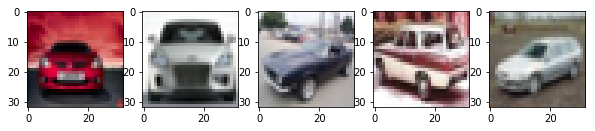

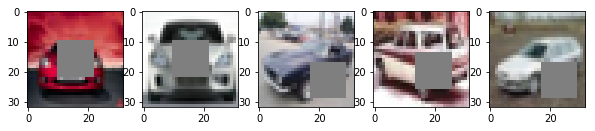

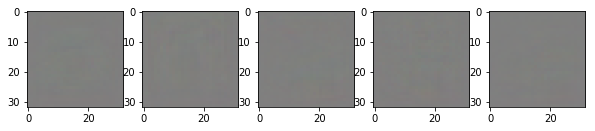

discriminator loss:  0.692800052984508
generator loss:  3.2067993


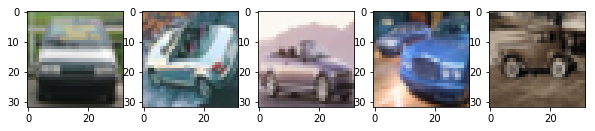

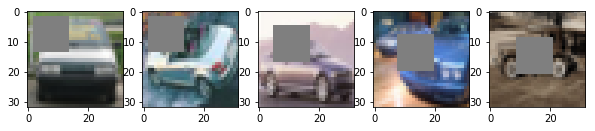

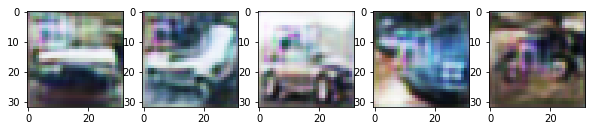

discriminator loss:  0.692837379552744
generator loss:  3.203222


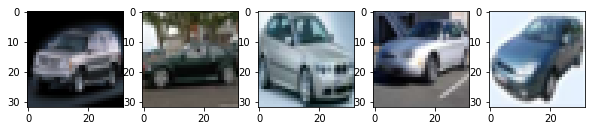

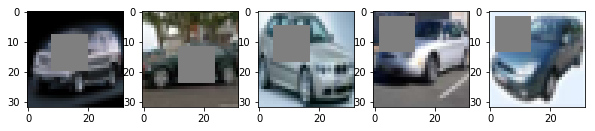

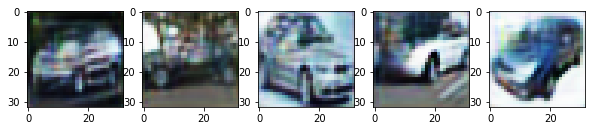

discriminator loss:  0.6928244050465608
generator loss:  3.2015665


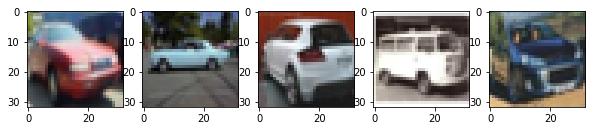

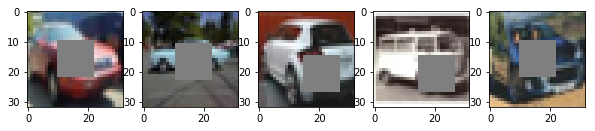

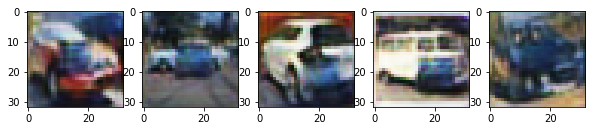

discriminator loss:  0.6926619100129825
generator loss:  3.2012649


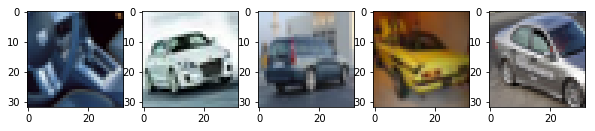

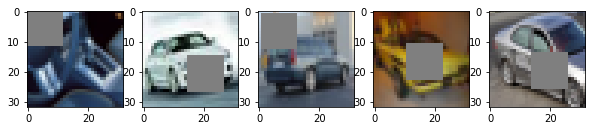

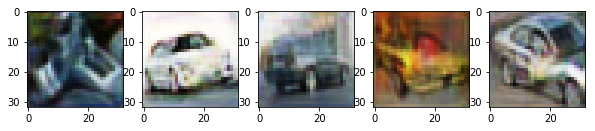

discriminator loss:  0.6923034728312197
generator loss:  3.20207


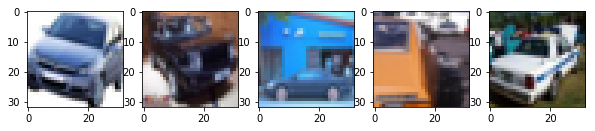

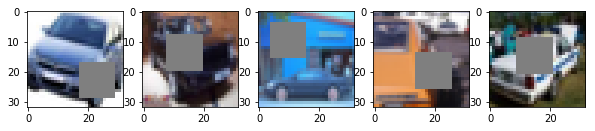

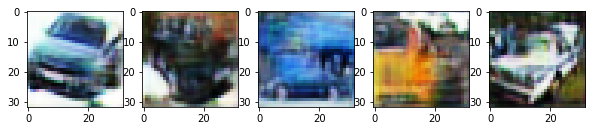

discriminator loss:  0.691688548680426
generator loss:  3.2051103


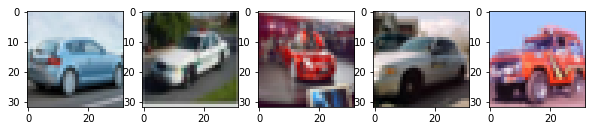

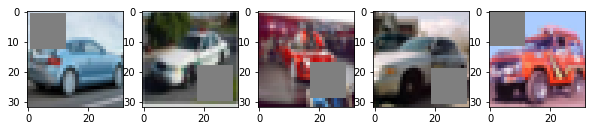

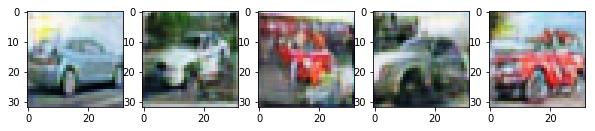

discriminator loss:  0.6906919326655561
generator loss:  3.2104125


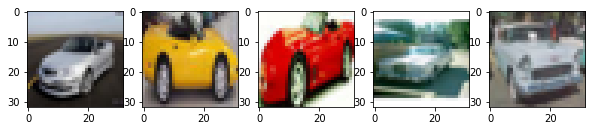

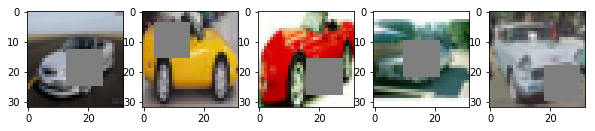

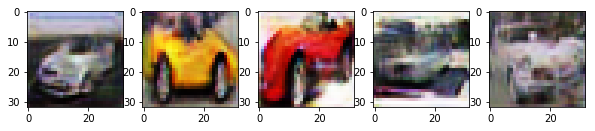

discriminator loss:  0.689530622702901
generator loss:  3.2185204


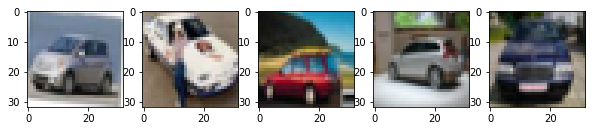

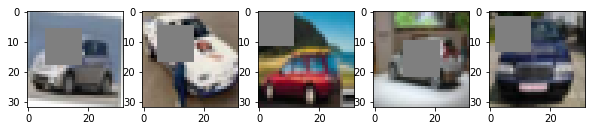

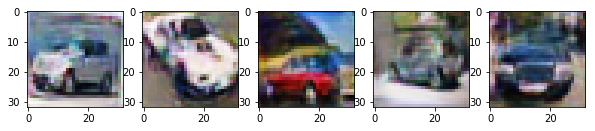

discriminator loss:  0.6884150457922498
generator loss:  3.2276826


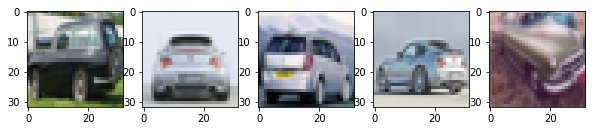

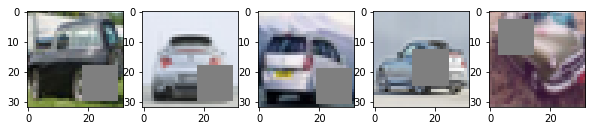

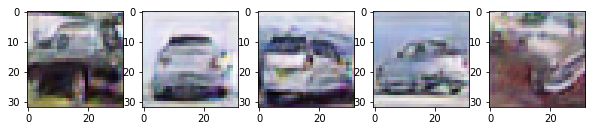

discriminator loss:  0.6873541730114328
generator loss:  3.2376301


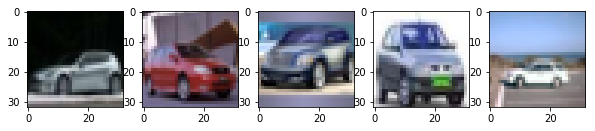

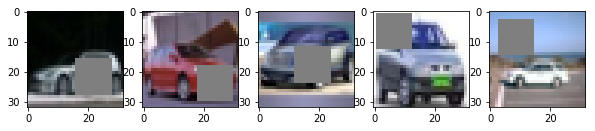

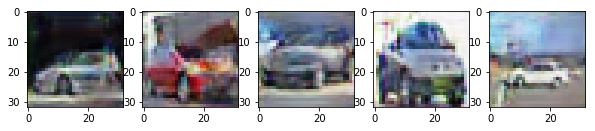

discriminator loss:  0.6865228695601598
generator loss:  3.2466474


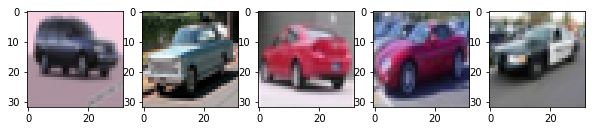

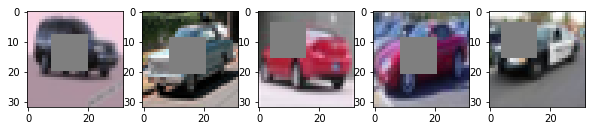

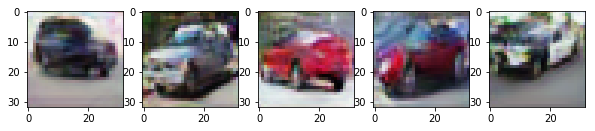

discriminator loss:  0.6858594791230868
generator loss:  3.254829


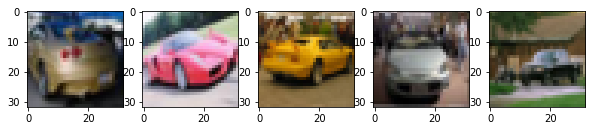

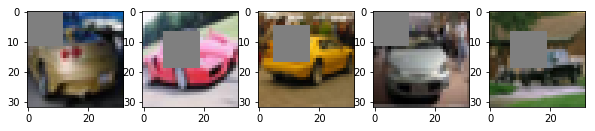

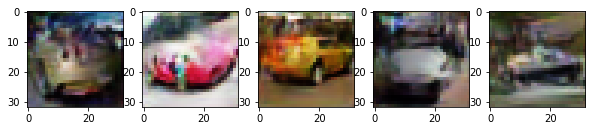

discriminator loss:  0.6852556768976126
generator loss:  3.2621388


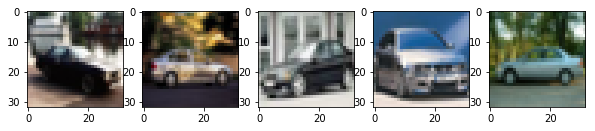

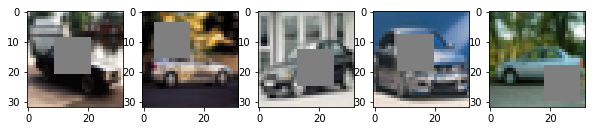

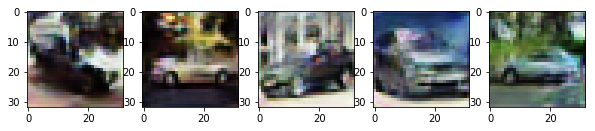

discriminator loss:  0.6846950296043856
generator loss:  3.268757


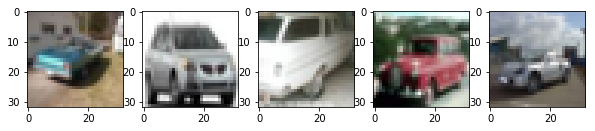

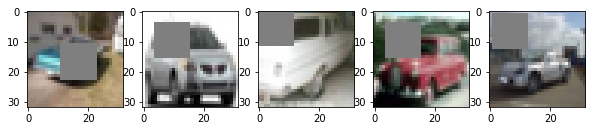

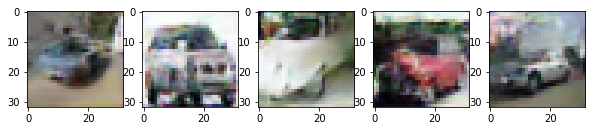

discriminator loss:  0.684187674503329
generator loss:  3.275136


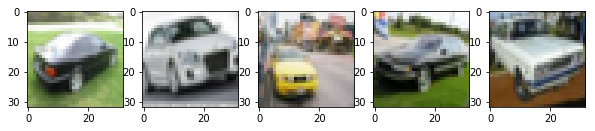

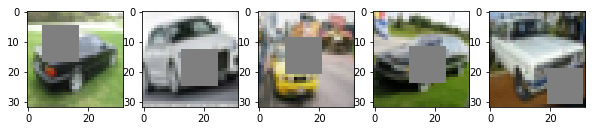

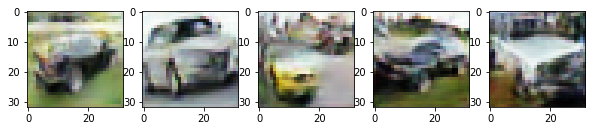

discriminator loss:  0.6836955283838665
generator loss:  3.2813225


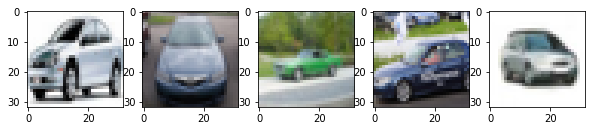

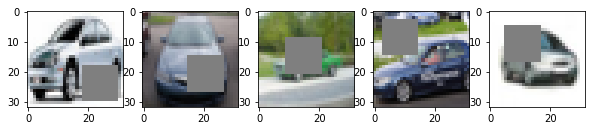

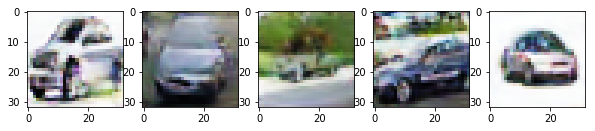

discriminator loss:  0.6831292234411128
generator loss:  3.287624


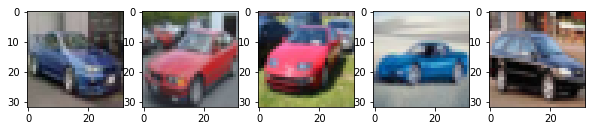

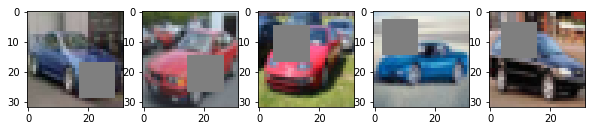

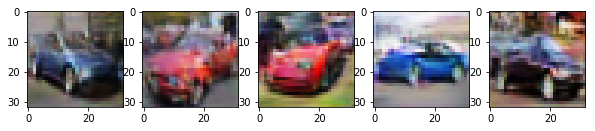

discriminator loss:  0.682531698486988
generator loss:  3.294132


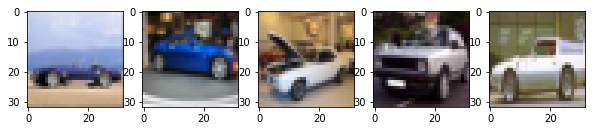

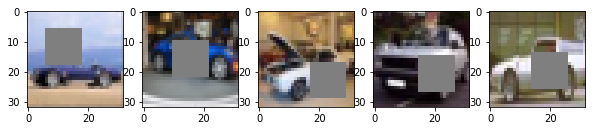

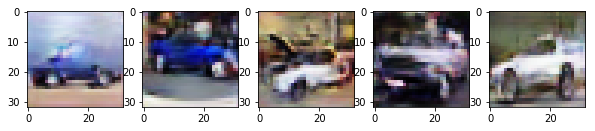

discriminator loss:  0.6819114168623023
generator loss:  3.3006582


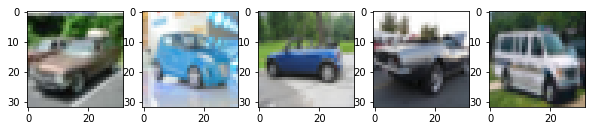

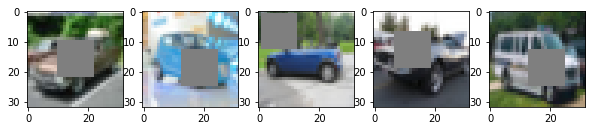

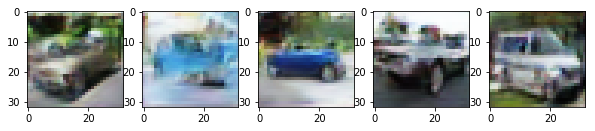

discriminator loss:  0.6813289716999217
generator loss:  3.3066194


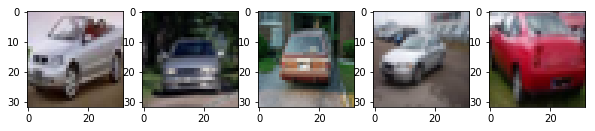

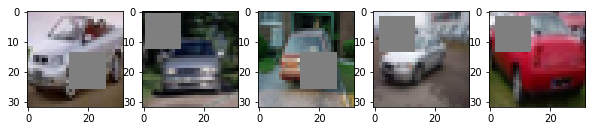

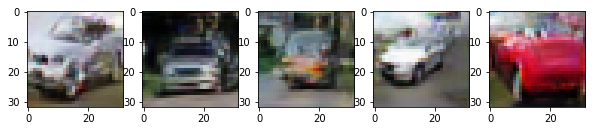

discriminator loss:  0.6807729650560918
generator loss:  3.31236


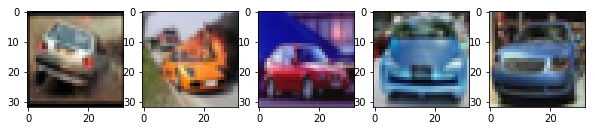

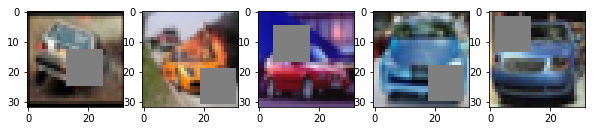

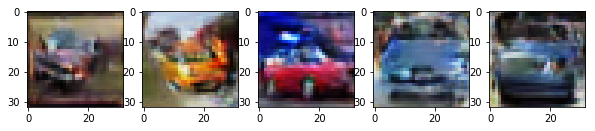

discriminator loss:  0.6801853719792272
generator loss:  3.3179317


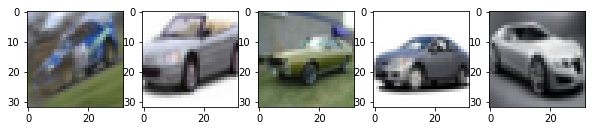

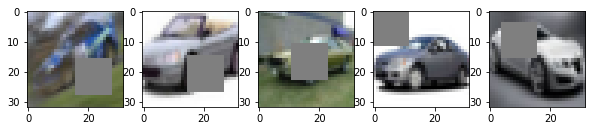

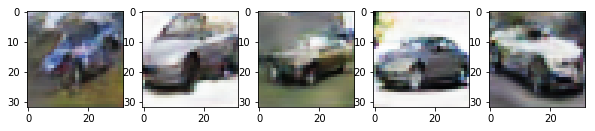

discriminator loss:  0.679520413317107
generator loss:  3.3239834


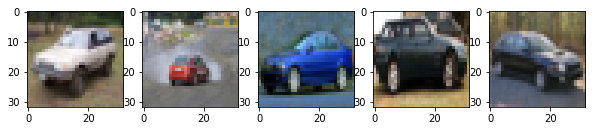

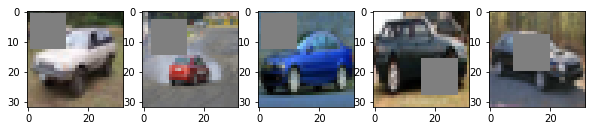

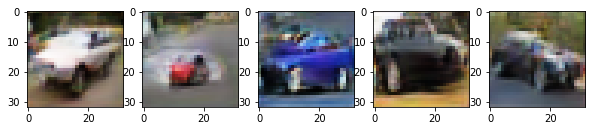

discriminator loss:  0.6789057790791032
generator loss:  3.329721


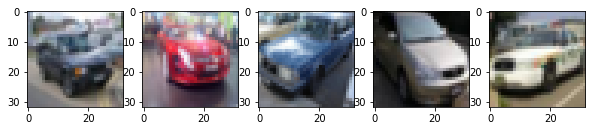

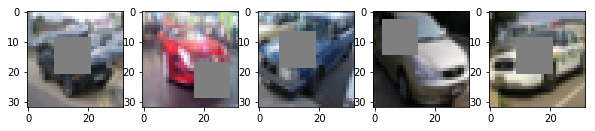

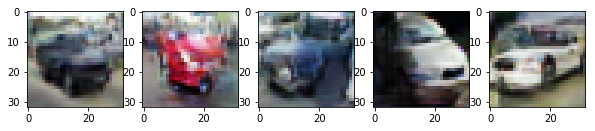

discriminator loss:  0.6783243235173526
generator loss:  3.3355625


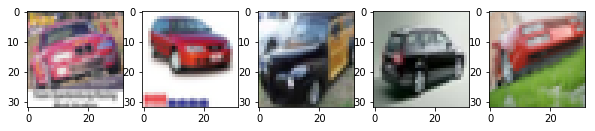

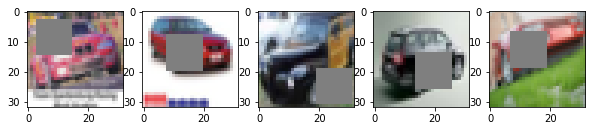

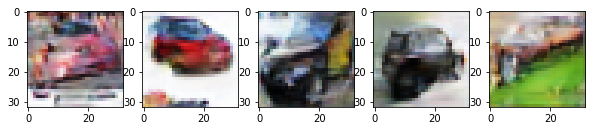

discriminator loss:  0.6778461867025766
generator loss:  3.340053


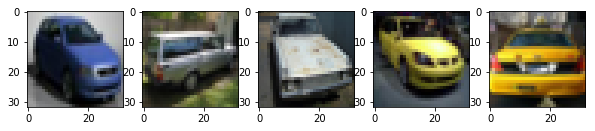

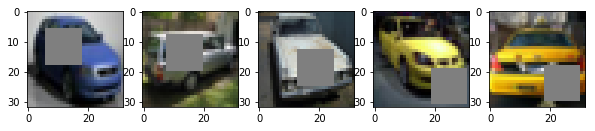

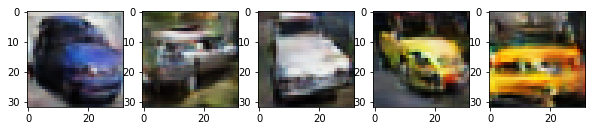

discriminator loss:  0.677376856866408
generator loss:  3.344608


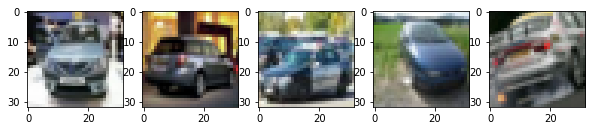

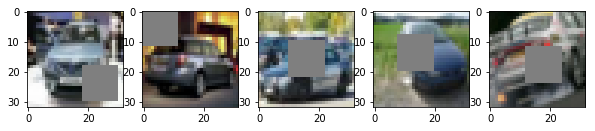

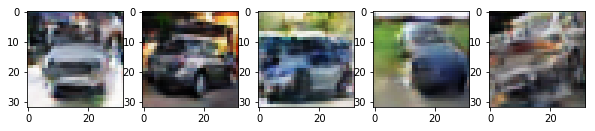

discriminator loss:  0.6768380865804826
generator loss:  3.3494945


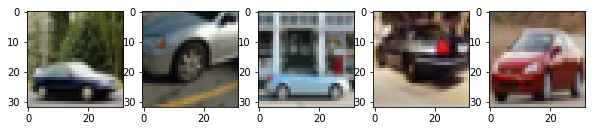

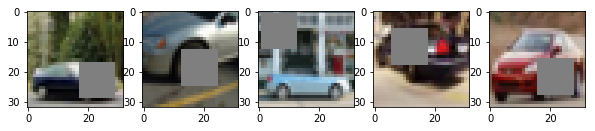

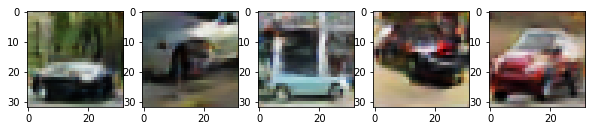

discriminator loss:  0.6762824434920366
generator loss:  3.3547435


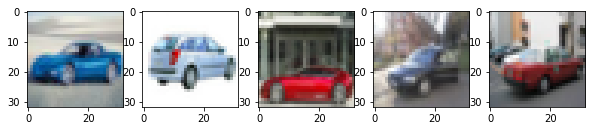

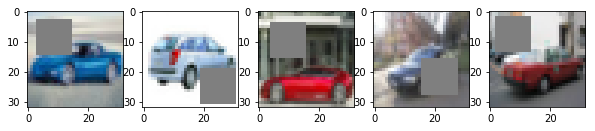

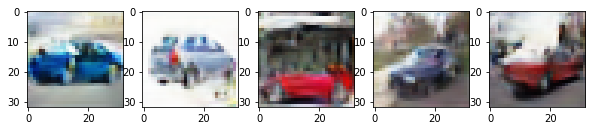

discriminator loss:  0.6756632821844877
generator loss:  3.3601546


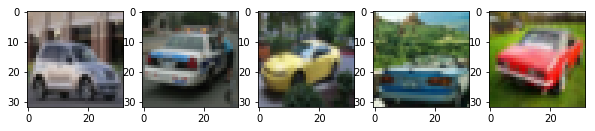

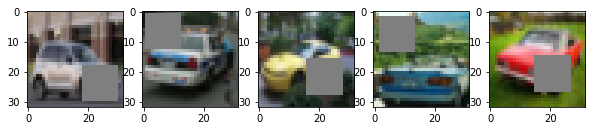

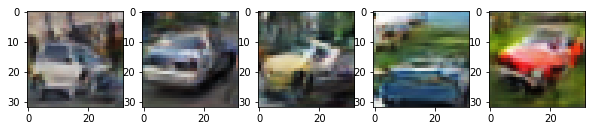

discriminator loss:  0.6750042098705619
generator loss:  3.3658943


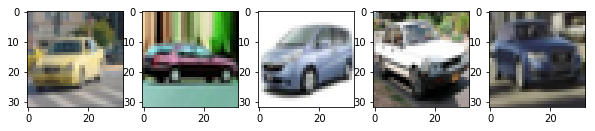

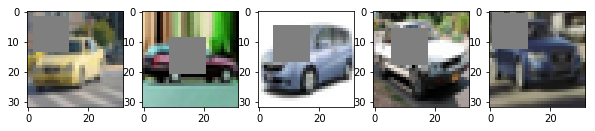

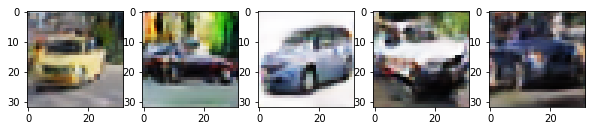

discriminator loss:  0.6743290765897444
generator loss:  3.3717308


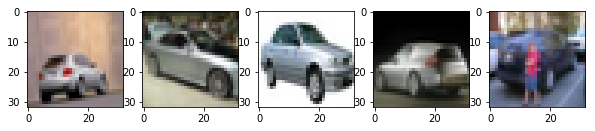

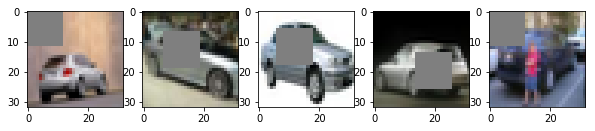

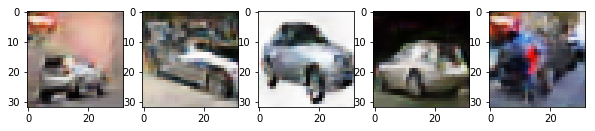

discriminator loss:  0.6736237923670274
generator loss:  3.377426


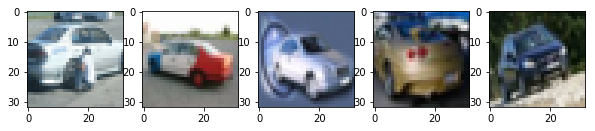

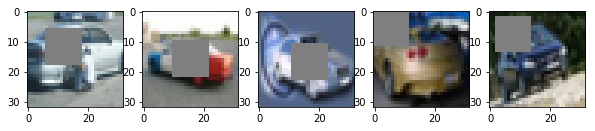

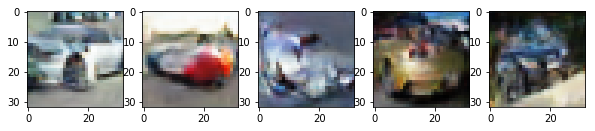

discriminator loss:  0.672951200598654
generator loss:  3.3831105


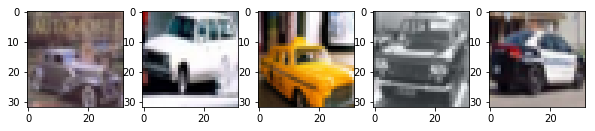

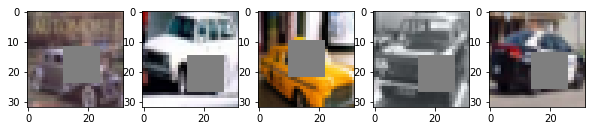

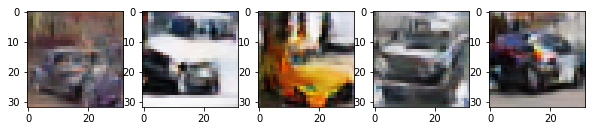

discriminator loss:  0.6723416491948729
generator loss:  3.388184


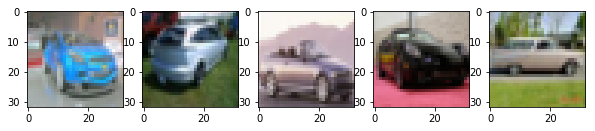

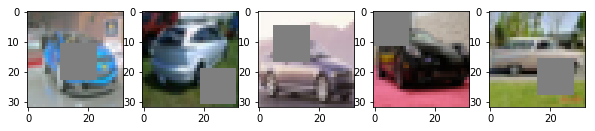

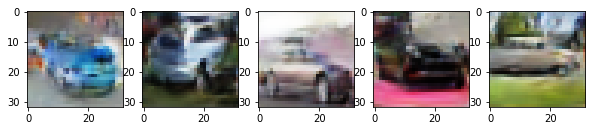

discriminator loss:  0.6716855668563338
generator loss:  3.3936324


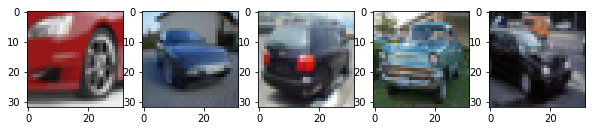

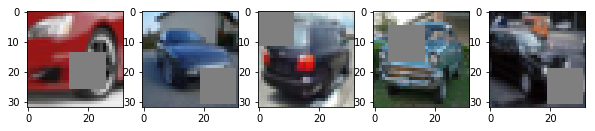

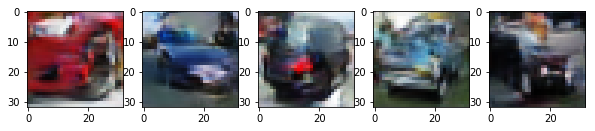

discriminator loss:  0.6709997614140988
generator loss:  3.398965


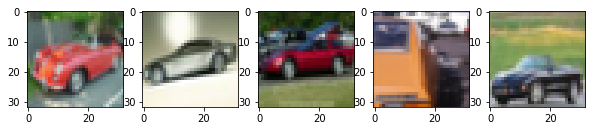

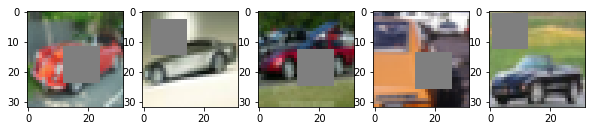

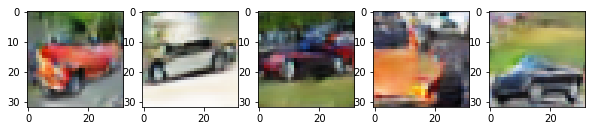

discriminator loss:  0.6702886836653377
generator loss:  3.4044187


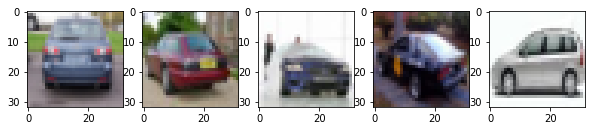

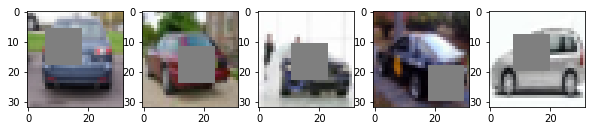

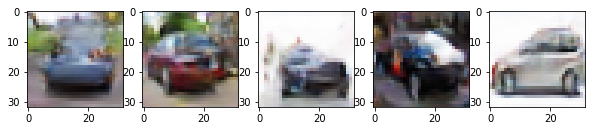

discriminator loss:  0.6696090732902803
generator loss:  3.4098587


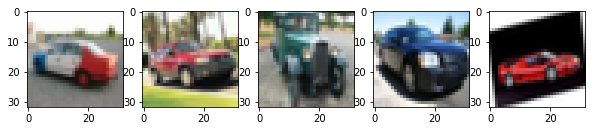

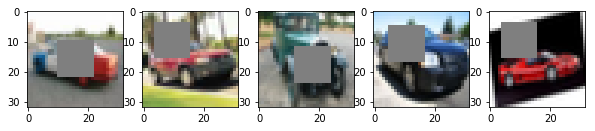

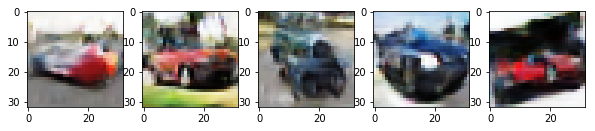

In [6]:
iterations = 20000
batch_size = 50
loss_d = []
loss_gan = []

# Scale the original image digits in the range of -1 to 1
x_train = x_train.reshape((x_train.shape[0],)+
                      (height,width,channels)).astype('float32')/127.5 - 1.
x_tra = x_tra.reshape((x_train.shape[0],)+
                      (height,width,channels)).astype('float32')/127.5 - 1.
x_test = x_test.reshape((x_test.shape[0],)+
                      (height,width,channels)).astype('float32')/127.5 - 1.
x_te = x_te.reshape((x_te.shape[0],)+
                      (height,width,channels)).astype('float32')/127.5 - 1.

# The training loop
for step in range(iterations):
  
    # Random select a batch of images from the training dataset
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    flaw_imgs = x_train[idx]
    real_imgs = x_tra[idx]
    real_cond = cond_train[idx]
    
    # Random digits used for generate the images
    #random_h = np.random.normal(size=(batch_size,h_dim))
    
    # The generated images
    generated_imgs = generator.predict(flaw_imgs)
    
    # The real images will be labeled 1 and the fakes are labeled 0
    labels_real = np.ones((batch_size,1))
    labels_fake = np.zeros((batch_size,1))
    
    # Train the discriminator.
    # Train the real images first and then the fake images
    d_loss_real = discriminator.train_on_batch(real_imgs,labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_imgs,labels_fake)
    # The avaeraged lose for one batch of training
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Random digits used to train the generator
    #random_h = np.random.normal(size=(batch_size,h_dim))
    
    # Train the generator by holding the discriminator frozen
    g_loss = gan.train_on_batch([flaw_imgs,real_imgs,real_cond],labels_real)
    #g_loss = gan.train_on_batch([random_h,real_imgs,real_cond],labels_real)
        
    loss_d.append(d_loss)
    loss_gan.append(g_loss)
    
    # Every 500 random batches trained, show the generated images
    if step % 500 == 0:
        
        print('discriminator loss: ', np.mean(loss_d))
        print('generator loss: ', np.mean(loss_gan))
        
        # Scale the images back to 0 to 1
        generated_imgs = (generated_imgs + 1.)/2.
        
        # Display 10 generated images
        Plot_Img(5,(real_imgs+1.)/2.,10,10)
        Plot_Img(5,(real_imgs*real_cond+1.)/2.,10,10)
        Plot_Img(5,generated_imgs,10,10)
        
        plt.show()

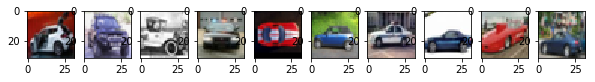

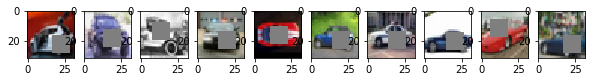

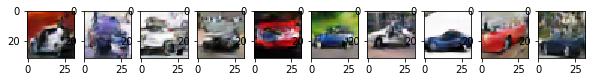

In [7]:
filled_test = generator.predict(x_test)
Plot_Img(10,(x_te+1.)/2.,10,10)
Plot_Img(10,(x_test*cond_test+1.)/2.,10,10)
Plot_Img(10,(filled_test+1.)/2.,10,10)

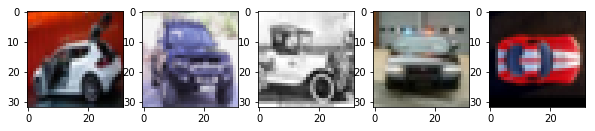

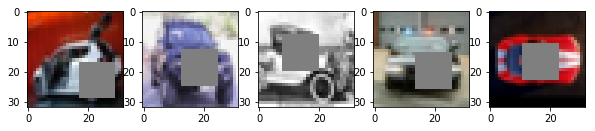

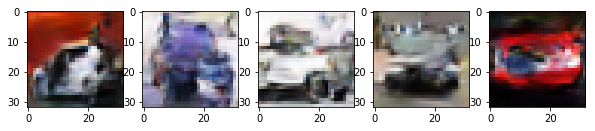

In [8]:
filled_test = generator.predict(x_test)
Plot_Img(5,(x_te+1.)/2.,10,10)
Plot_Img(5,(x_test*cond_test+1.)/2.,10,10)
Plot_Img(5,(filled_test+1.)/2.,10,10)

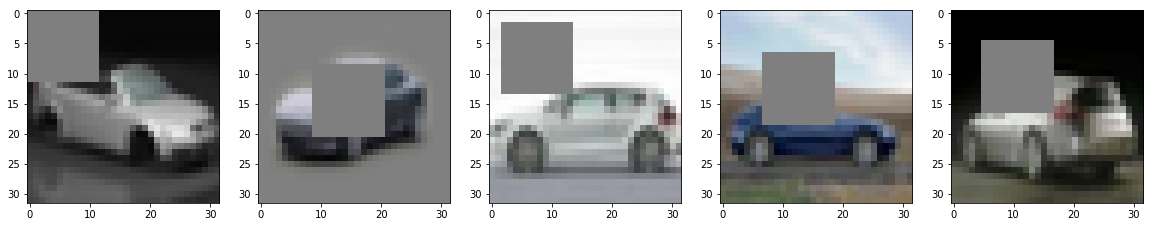

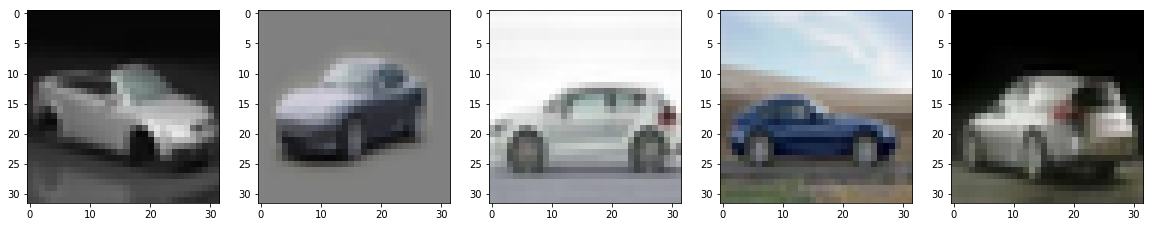

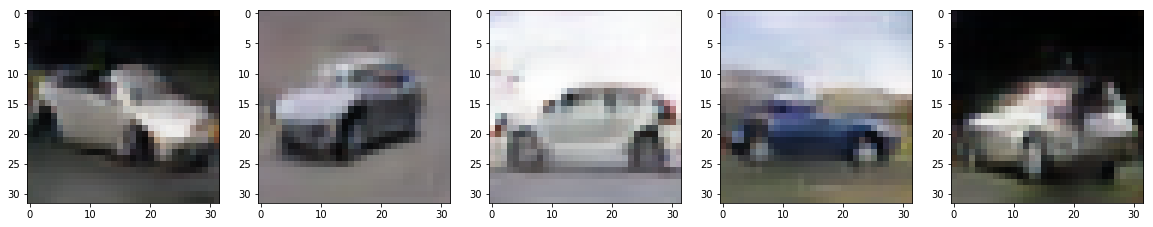

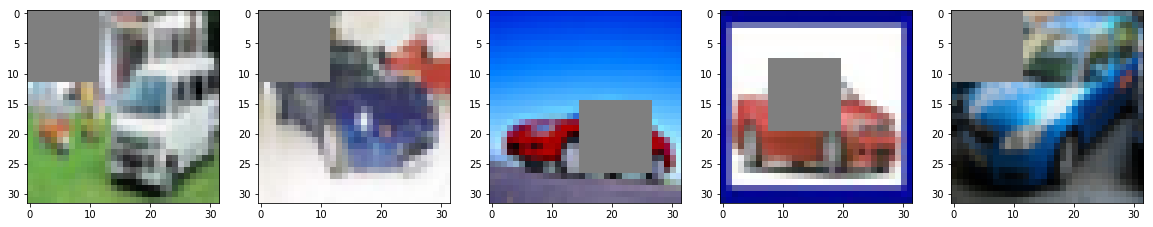

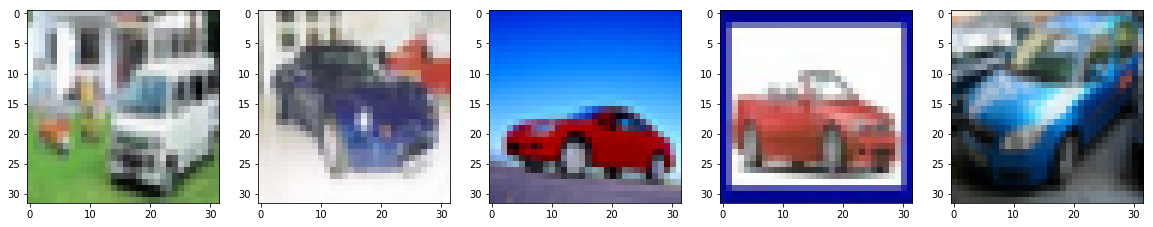

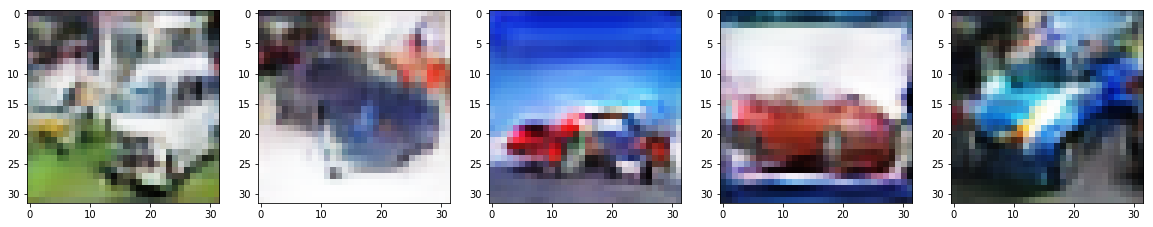

In [12]:
a = (x_te+1.)/2.
b = (x_test*cond_test+1.)/2.
c = (filled_test+1.)/2.

sqerror = []
for i in range(1000):
  sqerror.append(np.sum((c[i]-a[i])**2))
sqerror = np.array(sqerror)

first_5 = np.argsort(sqerror)[0:5]
last_5 = np.argsort(sqerror)[995:1000]

Plot_Img(5,b[first_5],20,10)
Plot_Img(5,a[first_5],20,10)
Plot_Img(5,c[first_5],20,10)

Plot_Img(5,b[last_5],20,10)
Plot_Img(5,a[last_5],20,10)
Plot_Img(5,c[last_5],20,10)